In [38]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import time, datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [62]:
df = pd.read_csv("berlinerstraße1519.csv", low_memory=False, infer_datetime_format=True, usecols= ["Datum ", "NO2 (µg/m³)", "Temperatur (°C)", "Globalstrahlung (W/m²)","Windrichtung (°)", "Windgeschwindigkeit (m/s)" ])

df["Time"]=df["Datum "].astype('datetime64[ns]')
df["day"] = df["Time"].dt.date
df["month"]=df["Time"].dt.month
df["hour"] = df["Time"].dt.time
df['date'] = df['Time'].dt.strftime('%m-%d %H:%M-%S')

grouped_year= df.groupby("date")
df_year= grouped_year.mean()

In [64]:
df_year
#df

,NO2 (µg/m³),Temperatur (°C),Globalstrahlung (W/m²),Windrichtung (°),Windgeschwindigkeit (m/s),month
date,,,,,,
01-01 00:00-00,27.220,6.720,6.80,194.60,0.980,1.0
01-01 00:30-00,27.200,6.175,5.50,222.50,1.075,1.0
01-01 01:00-00,27.125,5.700,5.50,219.25,0.850,1.0
01-01 01:30-00,25.750,5.800,5.75,216.75,1.150,1.0
01-01 02:00-00,26.425,5.800,5.50,142.25,1.125,1.0
...,...,...,...,...,...,...
12-31 21:30-00,26.175,7.125,7.25,195.50,1.225,12.0
12-31 22:00-00,25.875,7.100,7.25,197.00,1.400,12.0
12-31 22:30-00,26.250,7.050,7.25,191.75,1.300,12.0


In [65]:
my_date_range = pd.date_range('2019-12-31 23:30:00', periods = 17569, freq="30min", closed = "right")
df_sep = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df_year["NO2 (µg/m³)"], "Globalstrahlung (W/m²)": df_year["Globalstrahlung (W/m²)"], "Temperatur (°C)": df_year["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df_year["Windgeschwindigkeit (m/s)"], "Windrichtung (°)": df_year["Windrichtung (°)"]}) 
df_sep["hour"] = df_sep["Time"].dt.time
df_sep["uhrzeit"] = df_sep["Time"].dt.hour
df_sep

,Time,NO2 (µg/m³),Globalstrahlung (W/m²),Temperatur (°C),Windgeschwindigkeit (m/s),Windrichtung (°),hour,uhrzeit
date,,,,,,,,
01-01 00:00-00,2020-01-01 00:00:00,27.220,6.80,6.720,0.980,194.60,00:00:00,0
01-01 00:30-00,2020-01-01 00:30:00,27.200,5.50,6.175,1.075,222.50,00:30:00,0
01-01 01:00-00,2020-01-01 01:00:00,27.125,5.50,5.700,0.850,219.25,01:00:00,1
01-01 01:30-00,2020-01-01 01:30:00,25.750,5.75,5.800,1.150,216.75,01:30:00,1
01-01 02:00-00,2020-01-01 02:00:00,26.425,5.50,5.800,1.125,142.25,02:00:00,2
...,...,...,...,...,...,...,...,...
12-31 21:30-00,2020-12-31 21:30:00,26.175,7.25,7.125,1.225,195.50,21:30:00,21
12-31 22:00-00,2020-12-31 22:00:00,25.875,7.25,7.100,1.400,197.00,22:00:00,22
12-31 22:30-00,2020-12-31 22:30:00,26.250,7.25,7.050,1.300,191.75,22:30:00,22


In [46]:
#df_sep_hour=df_sep.resample("H").mean()

In [69]:
# aufteilen in 4 seasons

# spring
mask_spring = (df_sep['Time'] >= '2020-03-1 00:00:00') & (df_sep['Time'] <= '2020-05-31 23:30:00')
df_spring=df_sep.loc[mask_spring]
df_spring.to_csv("spring.csv")
# summer

mask_summer = (df_sep['Time'] >= '2020-06-1 00:00:00') & (df_sep['Time'] <= '2020-08-31 23:30:00')
df_summer=df_sep.loc[mask_summer]
# autumn

mask_autumn = (df_sep['Time'] >= '2020-09-1 00:00:00') & (df_sep['Time'] <= '2020-11-30 23:30:00')
df_autumn=df_sep.loc[mask_autumn]
# winter

mask_winter1 = (df_sep['Time'] >= '2020-12-1 00:00:00')& (df_sep['Time'] <= '2020-12-31 23:30:00') 
mask_winter2= (df_sep['Time']>='2020-01-1 00:00:00') & (df_sep['Time'] <= '2020-02-28 23:30:00')
df_winter1=df_sep.loc[mask_winter1]
df_winter2=df_sep.loc[mask_winter2]
df_winter= df_winter2.append([df_winter1])


seasons={0:"spring", 1:"summer", 2:"autumn", 3:"winter"}
cols=["green", "gold", "saddlebrown", "darkblue"]

def hour_seasons(data, seasons):
    
    hour= data.groupby("hour")
    df_hour= hour.mean()
    return df_hour

conds=[]
time={0:'00:00:00',1:'01:00:00', 2:'02:00:00', 3:'03:00:00', 4:'04:00:00', 5:'05:00:00', 6:'06:00:00', 7:'07:00:00', 8:'08:00:00', 9:'09:00:00', 10:'10:00:00', 11:'11:00:00', 12:'12:00:00', 13:'13:00:00', 14:'14:00:00', 15:'15:00:00', 16:'16:00:00', 17:'17:00:00', 18:'18:00:00', 19:'19:00:00', 20:'20:00:00', 21:'21:00:00', 22:'22:00:00', 23:'23:00:00', 24:'24:00:00'}

for i in range(0,23):
    cond=(df_spring['Time'].dt.strftime('%H:%M:%S') == time[i])
    conds.append(cond)
    


In [51]:
### mittelwert, standardabweichung, Standardfehler
df_spring_hour=df_spring.groupby(["hour"])[["NO2 (µg/m³)"]].mean()
df_summer_hour=df_summer.groupby(["hour"])[["NO2 (µg/m³)"]].mean()
df_autumn_hour=df_autumn.groupby(["hour"])[["NO2 (µg/m³)"]].mean()
df_winter_hour=df_winter.groupby(["hour"])[["NO2 (µg/m³)"]].mean()

df_spring_hour_std=df_spring.groupby(["hour"])[["NO2 (µg/m³)"]].std()
df_summer_hour_std=df_summer.groupby(["hour"])[["NO2 (µg/m³)"]].std()
df_autumn_hour_std=df_autumn.groupby(["hour"])[["NO2 (µg/m³)"]].std()
df_winter_hour_std=df_winter.groupby(["hour"])[["NO2 (µg/m³)"]].std()

df_spring_hour_stand= df_spring_hour_std/(np.sqrt(92))   # 92: Anzahl der Einträge in df_spring_hour ???
df_summer_hour_stand= df_summer_hour_std/(np.sqrt(92))
df_autumn_hour_stand= df_autumn_hour_std/(np.sqrt(91))
df_winter_hour_stand= df_winter_hour_std/(np.sqrt(90))

In [52]:
df_winter_hour["std"] = df_winter_hour_stand["NO2 (µg/m³)"]
df_autumn_hour["std"] = df_autumn_hour_stand["NO2 (µg/m³)"]
df_summer_hour["std"] = df_summer_hour_stand["NO2 (µg/m³)"]
df_spring_hour["std"] = df_spring_hour_stand["NO2 (µg/m³)"]

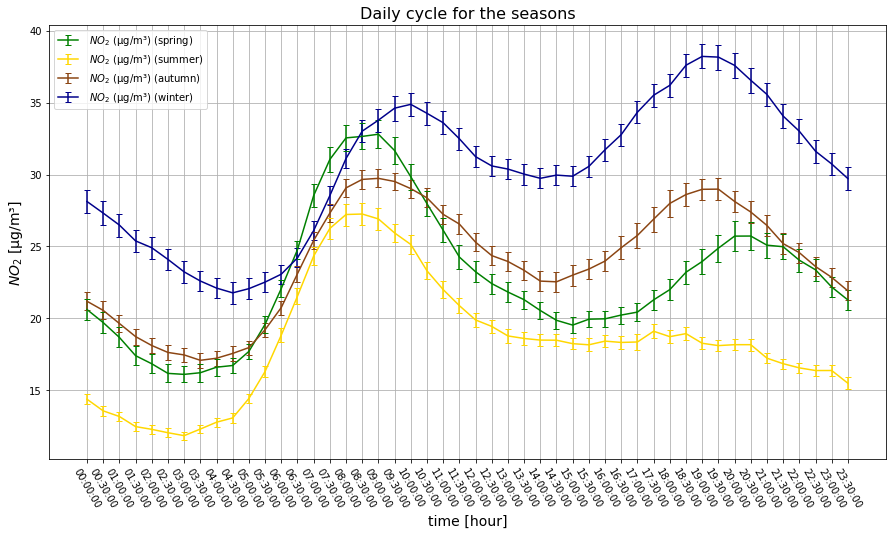

In [53]:
ax=df_spring_hour.plot(grid=True, y="NO2 (µg/m³)",label= f" $NO_{2}$ (µg/m³) ({seasons[0]})", figsize=(15,8),xticks=df_spring_hour.index, c="green", yerr="std", capsize=np.pi )
df_summer_hour.plot(grid=True,y="NO2 (µg/m³)", label= f" $NO_{2}$ (µg/m³) ({seasons[1]})", ax=ax, c="gold", yerr="std", capsize=np.pi)
df_autumn_hour.plot(grid=True, y="NO2 (µg/m³)", label= f" $NO_{2}$ (µg/m³) ({seasons[2]})", ax=ax, c="saddlebrown", yerr="std", capsize=np.pi)
df_winter_hour.plot(grid=True, y="NO2 (µg/m³)", label= f" $NO_{2}$ (µg/m³) ({seasons[3]})", ax=ax, c="darkblue", yerr="std", capsize=np.pi)

ax.set_xlabel('time [hour]', fontsize=14)
ax.set_ylabel('$NO_{2}$ [µg/m³]', fontsize=14)
plt.title("Daily cycle for the seasons", fontsize=16)
ax.set_xticklabels(labels=df_spring_hour.index, rotation=300) #noch andere rotation wählen
plt.savefig("Dailycyclefortheseasons.png")